# Database descriptive statistics
06/06/2022

## To do

- Distribution of SP length
- Residue composition comparison against SwissProt
- Taxonomic classification
- Sequence logo of the SP cleavage sites

***In all cases do separate graphs for the training and benchmark datasets***




### 1. Importing the dataset

In [2]:
import pandas as pd

In [3]:
train = pd.read_csv('training_set.tsv', sep='\t')

In [4]:
bench = pd.read_csv('benchmark_set.tsv', sep='\t')

In [5]:
train

,UniProtKB accession,Taxa,Kingdom,Class,Cross-validation fold,Sequence (first 50 N-terminal residues),SP cleavage-site annotation
0,P61916,Homo sapiens (Human),Metazoa,SP,0,MRFLAATFLLLALSTAAQAEPVQFKDCGSVDGVIKEVNVSPCPTQP...,SSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNNN...
1,Q7M3V1,Chelonus sp. nr. curvimaculatus (Parasitic wasp),Metazoa,SP,0,MAGKEVIFIMALFIAVESSPIFSFDDLVCPSVTSLRVNVEKNECST...,SSSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNN...
2,Q08738,Bombyx mori (Silk moth),Metazoa,SP,0,MRVFLAICLSLTVALAAETGKYTPFQYNRVYSTVSPFVYKPGRYVA...,SSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
3,Q41350,Solanum lycopersicum (Tomato) (Lycopersicon es...,Plants,SP,0,MASSSAKILLPLSLLFTLLSLSQSTNPNFILTLVNNCPYTIWPAIQ...,SSSSSSSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNN...
4,Q86SE1,Androctonus amoreuxi (African fattail scorpion...,Metazoa,SP,0,MNYLVMISLALLLMIGVESVRDGYIVYPHNCVYHCIPSCDGLCKEN...,SSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNNN...
...,...,...,...,...,...,...,...
1718,P62597,Gallus gallus (Chicken),Metazoa,NO_SP,4,MPVQVLKIIKGKPETQLPSHLQREDLKHLQTGLDHTNKYFQGIVIL...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
1719,Q7K4M4,Drosophila melanogaster (Fruit fly),Metazoa,NO_SP,4,MSKFLDMLSGSQCVSLEKCGDVVVSTNDCMIALYCHFCRDLFTQLP...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
1720,Q14146,Homo sapiens (Human),Metazoa,NO_SP,4,MAAVYSGISLKLKSKTTSWEDKLKLAHFAWISHQCFLPNKEQVLLD...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
1721,B2RWS6,Mus musculus (Mouse),Metazoa,NO_SP,4,MAENVVEPGPPSAKRPKLSSPALSASASDGTDFGSLFDLEHDLPDE...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...


In [6]:
train.shape

(1723, 7)

### 2. SP length distribution

#### Train

In [7]:
train[train.Class=='SP'].shape

(258, 7)

In [8]:
train_sp = train[train.Class=='SP'].iloc[:,6]

In [9]:
train_sp.head()

0    SSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNNN...
1    SSSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNN...
2    SSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
3    SSSSSSSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNN...
4    SSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNNN...
Name: SP cleavage-site annotation, dtype: object

In [10]:
train_sp.shape

(258,)

In [11]:
def sp_distrib(sequences):
  '''Counts the number of 'S' inside the Series of strings'''
  dist = []
  for seq in sequences:
    #print(seq)
    dist.append(seq.count('S'))
    #dist.append(type(seq))
  return dist

In [12]:
train_dist = sp_distrib(train_sp) #Distribution list

In [13]:
import seaborn as sb

[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'SP length'),
 Text(0.5, 1.0, 'Training data')]

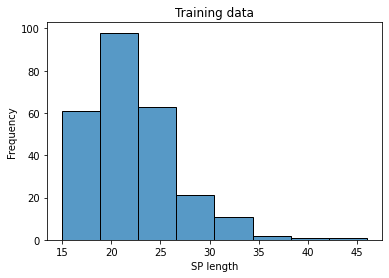

In [262]:
sb.histplot(train_dist, bins=8).set(title='Training data', xlabel='SP length', ylabel='Frequency') #choosing bin size to avoid empty spaces

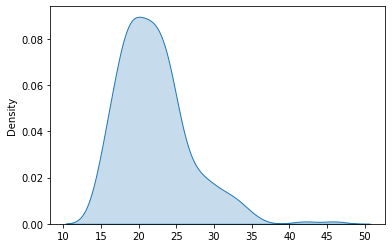

In [260]:
sb.kdeplot(train_dist, shade=True)

#### Benchmark

In [15]:
bench.head()

,UniProtKB accession,Taxa,Kingdom,Class,Sequence (first 50 N-terminal residues),SP cleavage-site annotation
0,Q8TF40,Homo sapiens (Human),Metazoa,NO_SP,MAPTLFQKLFSKRTGLGAPGRDARDPDCGFSWPLPEFDPSQIRLIV...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
1,Q1ENB6,Arabidopsis thaliana (Mouse-ear cress),Plants,NO_SP,MDFTSLETTTFEEVVIALGSNVGNRMNNFKEALRLMKDYGISVTRH...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
2,Q9BZS1,Homo sapiens (Human),Metazoa,NO_SP,MPNPRPGKPSAPSLALGPSPGASPSWRAAPKASDLLGARGPGGTFQ...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
3,F4K2A1,Arabidopsis thaliana (Mouse-ear cress),Plants,NO_SP,MFAVSIVPRTTSCRLSSAFLCQLSIPLTLRLHHHYQHHQPHLPSPL...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
4,Q9SZL8,Arabidopsis thaliana (Mouse-ear cress),Plants,NO_SP,MMDNEVLDFDIGVGVSSGGDVDDDAIDIEHHALDDDDMLDSPIMPC...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...


In [16]:
bench[bench.Class=='SP'].shape

(209, 6)

In [17]:
bench_sp = bench[bench.Class=='SP'].iloc[:,5]

In [18]:
bench_sp.head()

6929    SSSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNN...
6930    SSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
6931    SSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNN...
6932    SSSSSSSSSSSSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNN...
6933    SSSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNN...
Name: SP cleavage-site annotation, dtype: object

In [19]:
bench_sp.shape

(209,)

In [20]:
bench_dist = sp_distrib(bench_sp) #Distribution list

[Text(0.5, 0, 'SP count'), Text(0.5, 1.0, 'Benchmark')]

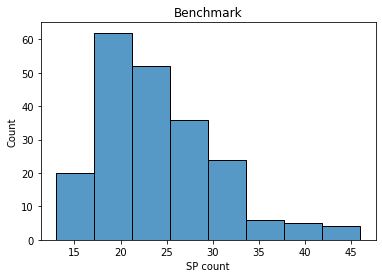

In [261]:
sb.histplot(bench_dist, bins=8).set(xlabel='SP count', title='Benchmark')

Now, I create a dataframe for training and benchmark data in order to easily make the superpositioned density distribution graph. 

In [281]:
dist_df_train = pd.DataFrame({'counts':train_dist})
dist_df_train['dataset'] = 'training data'

In [282]:
dist_df_bench = pd.DataFrame({'counts':bench_dist})
dist_df_bench['dataset'] = 'benchmark data'

In [285]:
dist_df = pd.concat([dist_df_train, dist_df_bench], ignore_index=True)

In [286]:
dist_df

,counts,dataset
0,19,training data
1,20,training data
2,16,training data
3,24,training data
4,19,training data
...,...,...
462,22,benchmark data
463,26,benchmark data
464,22,benchmark data
465,21,benchmark data


In [294]:
dist_df.groupby('dataset').describe()

counts                                                   
                count       mean       std   min   25%   50%   75%   max
dataset                                                                 
benchmark data  209.0  24.196172  6.128808  13.0  20.0  23.0  27.0  46.0
training data   258.0  22.027132  4.747643  15.0  19.0  21.0  24.0  46.0

[Text(0.5, 0, 'SP length')]

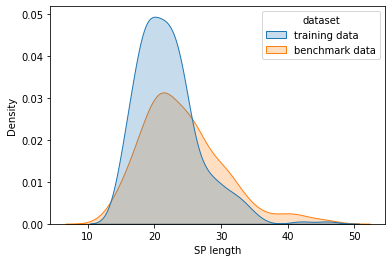

In [292]:
sb.kdeplot(dist_df['counts'], shade=True, hue=dist_df['dataset']).set(xlabel='SP length')

### 3. Residue composition comparison

#### A. Starting with the training data

In [23]:
train_sp = train[train.Class=='SP']

In [24]:
train_sp.head()

,UniProtKB accession,Taxa,Kingdom,Class,Cross-validation fold,Sequence (first 50 N-terminal residues),SP cleavage-site annotation
0,P61916,Homo sapiens (Human),Metazoa,SP,0,MRFLAATFLLLALSTAAQAEPVQFKDCGSVDGVIKEVNVSPCPTQP...,SSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNNN...
1,Q7M3V1,Chelonus sp. nr. curvimaculatus (Parasitic wasp),Metazoa,SP,0,MAGKEVIFIMALFIAVESSPIFSFDDLVCPSVTSLRVNVEKNECST...,SSSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNN...
2,Q08738,Bombyx mori (Silk moth),Metazoa,SP,0,MRVFLAICLSLTVALAAETGKYTPFQYNRVYSTVSPFVYKPGRYVA...,SSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
3,Q41350,Solanum lycopersicum (Tomato) (Lycopersicon es...,Plants,SP,0,MASSSAKILLPLSLLFTLLSLSQSTNPNFILTLVNNCPYTIWPAIQ...,SSSSSSSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNN...
4,Q86SE1,Androctonus amoreuxi (African fattail scorpion...,Metazoa,SP,0,MNYLVMISLALLLMIGVESVRDGYIVYPHNCVYHCIPSCDGLCKEN...,SSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNNN...


In [25]:
train_sp['length of sequence'] = len(train_sp.loc[:,'Sequence (first 50 N-terminal residues)'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [26]:
train_sp.head()

,UniProtKB accession,Taxa,Kingdom,Class,Cross-validation fold,Sequence (first 50 N-terminal residues),SP cleavage-site annotation,length of sequence
0,P61916,Homo sapiens (Human),Metazoa,SP,0,MRFLAATFLLLALSTAAQAEPVQFKDCGSVDGVIKEVNVSPCPTQP...,SSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNNN...,258
1,Q7M3V1,Chelonus sp. nr. curvimaculatus (Parasitic wasp),Metazoa,SP,0,MAGKEVIFIMALFIAVESSPIFSFDDLVCPSVTSLRVNVEKNECST...,SSSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNN...,258
2,Q08738,Bombyx mori (Silk moth),Metazoa,SP,0,MRVFLAICLSLTVALAAETGKYTPFQYNRVYSTVSPFVYKPGRYVA...,SSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,258
3,Q41350,Solanum lycopersicum (Tomato) (Lycopersicon es...,Plants,SP,0,MASSSAKILLPLSLLFTLLSLSQSTNPNFILTLVNNCPYTIWPAIQ...,SSSSSSSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNN...,258
4,Q86SE1,Androctonus amoreuxi (African fattail scorpion...,Metazoa,SP,0,MNYLVMISLALLLMIGVESVRDGYIVYPHNCVYHCIPSCDGLCKEN...,SSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNNN...,258


In [27]:
train_sp.describe()

,Cross-validation fold,length of sequence
count,258.000000,258.0
mean,1.984496,258.0
std,1.411374,0.0
min,0.000000,258.0
25%,1.000000,258.0
50%,2.000000,258.0
75%,3.000000,258.0
max,4.000000,258.0


Yes, all of the sequences have the same length!

In [78]:
def composition(data):
  sequence = [seq for seq in data['Sequence (first 50 N-terminal residues)']]
  sp = [seq for seq in data['SP cleavage-site annotation']]
  #sequence = data['Sequence (first 50 N-terminal residues)'].tolist()
  #sp = data['SP cleavage-site annotation'].tolist()
  signals = {}
  for i in range(len(sequence)):
    for j in range(len(sequence[0])):
      if sp[i][j] == "S":
        signals[sequence[i][j]] = signals.get(sequence[i][j], 0) + 1
  return signals




In [79]:
comp_dict = composition(train_sp) #This is the residue count for the sps in our training set

In [80]:
comp_dict

{'M': 373,
 'R': 177,
 'F': 301,
 'L': 1318,
 'A': 747,
 'T': 270,
 'S': 413,
 'Q': 118,
 'G': 328,
 'K': 133,
 'E': 87,
 'V': 504,
 'I': 239,
 'P': 198,
 'C': 155,
 'N': 54,
 'Y': 52,
 'W': 105,
 'D': 55,
 'H': 56}

Next steps:
- Check whether it is simpler to continue using the dictionary or to transform the data into a list (that could be converted into a numpy array, which is easier to handle for mathematical transformations).
- In either case, it can be fed into seaborn to create the bar graph.  

In [81]:
#Residue order
res = ['G', 'A', 'V', 'P', 'L', 'I', 'M', 'F', 'W', 'Y', 'S', 'T', 'C', 'N', 'Q', 'H', 'D', 'E', 'K', 'R']

In [82]:
comp_list = [comp_dict[residue] for residue in res]
#for residue in res:
 # comp_list.append(comp_dict[residue])

In [83]:
comp_list

[328,
 747,
 504,
 198,
 1318,
 239,
 373,
 301,
 105,
 52,
 413,
 270,
 155,
 54,
 118,
 56,
 55,
 87,
 133,
 177]

In [84]:
import numpy as np

In [85]:
comp_array = np.array(comp_list)

In [86]:
comp_array

array([ 328,  747,  504,  198, 1318,  239,  373,  301,  105,   52,  413,
        270,  155,   54,  118,   56,   55,   87,  133,  177])

In [87]:
comp_percentages= (comp_array/comp_array.sum())*100

In [88]:
comp_array.sum()

5683

In [89]:
comp_percentages

array([ 5.77159951, 13.14446595,  8.86855534,  3.48407531, 23.19197607,
        4.20552525,  6.56343481,  5.29649833,  1.8476157 ,  0.91500968,
        7.2672884 ,  4.75101179,  2.72743269,  0.95020236,  2.07636812,
        0.98539504,  0.9677987 ,  1.53088158,  2.34031321,  3.11455217])

In [90]:
train_comp_df = pd.DataFrame({'residues':res, 'percentages':comp_percentages})

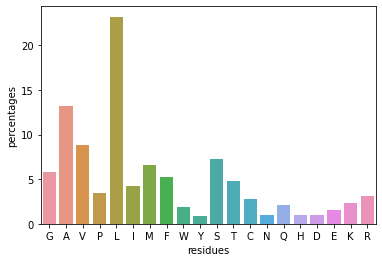

In [91]:
sb.barplot(data=train_comp_df, x="residues", y="percentages") #first attempt

https://seaborn.pydata.org/generated/seaborn.barplot.html

So good so far. Now, we need to expand the train_comp_df dataframe to include data from Swissprot's composition. Therefore, we must:

- Add a new column that classifies the data as "training data". The column should be called "dataset"
- We will use this column to add "hue" to our barplot. This will allow us to superimpose the SwissProt data to our training data. 

In [92]:
train_comp_df['dataset'] = "training data"

In [93]:
train_comp_df.head()

,residues,percentages,dataset
0,G,5.771600,training data
1,A,13.144466,training data
2,V,8.868555,training data
3,P,3.484075,training data
4,L,23.191976,training data


#### B. Adding the background composition

In [94]:
aa_background_composition = {}
aa_list=['A','Q','L','S','R','E','K','T','N','G','M','W','D','H','F','Y','C','I','P','V']
aa_percentage=[8.25,3.93,9.65,6.64,5.53,6.72,5.80,5.35,4.06,7.07,2.41,1.10,5.46,2.27,3.86,2.92,1.38,5.91,4.74,6.86]
for i,j in zip(aa_list,aa_percentage):
  aa_background_composition[i]=j

In [95]:
aa_background_composition

{'A': 8.25,
 'Q': 3.93,
 'L': 9.65,
 'S': 6.64,
 'R': 5.53,
 'E': 6.72,
 'K': 5.8,
 'T': 5.35,
 'N': 4.06,
 'G': 7.07,
 'M': 2.41,
 'W': 1.1,
 'D': 5.46,
 'H': 2.27,
 'F': 3.86,
 'Y': 2.92,
 'C': 1.38,
 'I': 5.91,
 'P': 4.74,
 'V': 6.86}

In [96]:
comp_background_list = [aa_background_composition[residue] for residue in res]

In [97]:
comp_background_array = np.array(comp_background_list)

In [98]:
comp_background_array

array([7.07, 8.25, 6.86, 4.74, 9.65, 5.91, 2.41, 3.86, 1.1 , 2.92, 6.64,
       5.35, 1.38, 4.06, 3.93, 2.27, 5.46, 6.72, 5.8 , 5.53])

In [99]:
background_comp_df = pd.DataFrame({'residues':res, 'percentages':comp_background_array})

In [100]:
background_comp_df['dataset'] = 'Swissprot'

In [101]:
train_and_backg_df = pd.concat([train_comp_df, background_comp_df], axis=0, ignore_index=True)

In [102]:
train_and_backg_df

,residues,percentages,dataset
0,G,5.771600,training data
1,A,13.144466,training data
2,V,8.868555,training data
3,P,3.484075,training data
4,L,23.191976,training data
5,I,4.205525,training data
6,M,6.563435,training data
7,F,5.296498,training data
8,W,1.847616,training data
9,Y,0.915010,training data


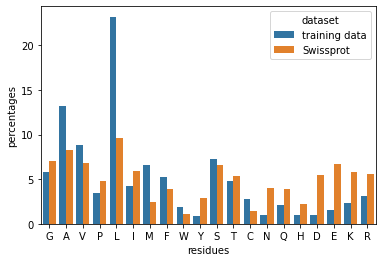

In [103]:
sb.barplot(data=train_and_backg_df, x="residues", y="percentages", hue="dataset")

#### C. Repeating the procedure for the benchmark

In [104]:
bench_sp = bench[bench.Class=='SP']

In [105]:
bench_sp.head()

,UniProtKB accession,Taxa,Kingdom,Class,Sequence (first 50 N-terminal residues),SP cleavage-site annotation
6929,A1X158,Rattus norvegicus (Rat),Metazoa,SP,MARNMNILTLFAVLIGSASAVYHPPSWTAWIAPKPWTAWKVHPPAW...,SSSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNN...
6930,D3Z9M3,Rattus norvegicus (Rat),Metazoa,SP,MLVILLMVVVLALSSAQDPNRDFVVSSQDVRERQPSSQQGTVGGQS...,SSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
6931,P42264,Patiria pectinifera (Starfish) (Asterina pecti...,Metazoa,SP,MTAPWRRLRSLVWEYWAGFLVCAFWIPDSRGMPHVIRIGGIFEYAD...,SSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNN...
6932,C9K4X8,Aspergillus oryzae (strain ATCC 42149 / RIB 40...,Fungi,SP,MTSNNRHLFQATCLVLLLLHAAFHGGALGEKYCDDDFHMAVFRTCA...,SSSSSSSSSSSSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNN...
6933,Q2U4L7,Homo sapiens (Human),Metazoa,SP,MMHFLSFCLSVASLVSYAGAASTFSPARPPALPLAVKSPYLSTWLS...,SSSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNN...


In [106]:
bench_comp_dict = composition(bench_sp)

In [107]:
bench_comp_list = [bench_comp_dict[residue] for residue in res]

In [108]:
bench_comp_array = np.array(bench_comp_list)

In [109]:
bench_comp_percentages= (bench_comp_array/bench_comp_array.sum())*100

In [110]:
bench_comp_df = pd.DataFrame({'residues':res, 'percentages':bench_comp_percentages})

In [111]:
bench_comp_df['dataset'] = "benchmark data"

In [112]:
bench_comp_df.shape #adding background rows

(20, 3)

In [113]:
bench_and_backg_df = pd.concat([bench_comp_df, background_comp_df], axis=0, ignore_index=True) #adding the background rows

In [114]:
bench_and_backg_df

,residues,percentages,dataset
0,G,6.149891,benchmark data
1,A,13.881748,benchmark data
2,V,8.068025,benchmark data
3,P,4.132885,benchmark data
4,L,20.506229,benchmark data
5,I,4.409729,benchmark data
6,M,5.991695,benchmark data
7,F,4.805220,benchmark data
8,W,2.036781,benchmark data
9,Y,1.028278,benchmark data


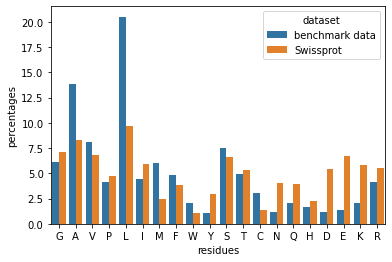

In [115]:
sb.barplot(data=bench_and_backg_df, x="residues", y="percentages", hue="dataset")

### 4. Species proportions

In [116]:
#Start

#### A. Training data

In [174]:
import matplotlib.pyplot as plt

In [138]:
train

,UniProtKB accession,Taxa,Kingdom,Class,Cross-validation fold,Sequence (first 50 N-terminal residues),SP cleavage-site annotation
0,P61916,Homo sapiens (Human),Metazoa,SP,0,MRFLAATFLLLALSTAAQAEPVQFKDCGSVDGVIKEVNVSPCPTQP...,SSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNNN...
1,Q7M3V1,Chelonus sp. nr. curvimaculatus (Parasitic wasp),Metazoa,SP,0,MAGKEVIFIMALFIAVESSPIFSFDDLVCPSVTSLRVNVEKNECST...,SSSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNN...
2,Q08738,Bombyx mori (Silk moth),Metazoa,SP,0,MRVFLAICLSLTVALAAETGKYTPFQYNRVYSTVSPFVYKPGRYVA...,SSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
3,Q41350,Solanum lycopersicum (Tomato) (Lycopersicon es...,Plants,SP,0,MASSSAKILLPLSLLFTLLSLSQSTNPNFILTLVNNCPYTIWPAIQ...,SSSSSSSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNN...
4,Q86SE1,Androctonus amoreuxi (African fattail scorpion...,Metazoa,SP,0,MNYLVMISLALLLMIGVESVRDGYIVYPHNCVYHCIPSCDGLCKEN...,SSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNNN...
...,...,...,...,...,...,...,...
1718,P62597,Gallus gallus (Chicken),Metazoa,NO_SP,4,MPVQVLKIIKGKPETQLPSHLQREDLKHLQTGLDHTNKYFQGIVIL...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
1719,Q7K4M4,Drosophila melanogaster (Fruit fly),Metazoa,NO_SP,4,MSKFLDMLSGSQCVSLEKCGDVVVSTNDCMIALYCHFCRDLFTQLP...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
1720,Q14146,Homo sapiens (Human),Metazoa,NO_SP,4,MAAVYSGISLKLKSKTTSWEDKLKLAHFAWISHQCFLPNKEQVLLD...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
1721,B2RWS6,Mus musculus (Mouse),Metazoa,NO_SP,4,MAENVVEPGPPSAKRPKLSSPALSASASDGTDFGSLFDLEHDLPDE...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...


In [139]:
train.shape

(1723, 7)

In [249]:
def pie_chart(df):
  species = df['Taxa']
  species_series = species.value_counts() #obtains the counts of each unique value
  species_series_sorted = species_series.sort_values(ascending=False) #alternative .nlargest(10)
  species_series_top = species_series_sorted[0:6] #extracting top 6
  species_series_rest = species_series_sorted[7:]
  others_series = pd.Series({'others':species_series_rest.sum()}) #creating a series that containg the sum of the others
  species_series_complete = pd.concat([species_series_top, others_series])
  print(species_series_complete)
  labels = species_series_complete.index.tolist() #labels
  count = species_series_complete.values.tolist() #count for each label
  colors = sb.color_palette('bright')[:len(labels)]  #define color palette
  plt.pie(count, colors = colors, autopct='%.0f%%')
  plt.legend(labels, loc='upper left', bbox_to_anchor=(1,1)) #bbox controls the position of the legend
  plt.show()



Homo sapiens (Human)                                                     434
Arabidopsis thaliana (Mouse-ear cress)                                   235
Saccharomyces cerevisiae (strain ATCC 204508 / S288c) (Baker's yeast)    219
Mus musculus (Mouse)                                                     197
Schizosaccharomyces pombe (strain 972 / ATCC 24843) (Fission yeast)      180
Rattus norvegicus (Rat)                                                   59
others                                                                   350
dtype: int64


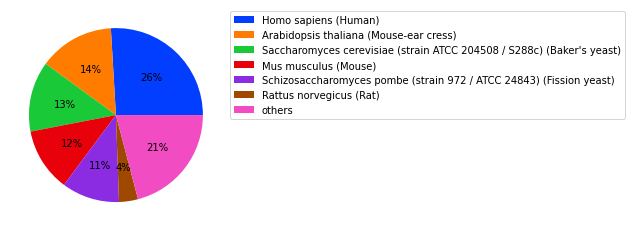

In [250]:
pie_chart(train)

#### B. Benchmark data

In [238]:
bench

,UniProtKB accession,Taxa,Kingdom,Class,Sequence (first 50 N-terminal residues),SP cleavage-site annotation
0,Q8TF40,Homo sapiens (Human),Metazoa,NO_SP,MAPTLFQKLFSKRTGLGAPGRDARDPDCGFSWPLPEFDPSQIRLIV...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
1,Q1ENB6,Arabidopsis thaliana (Mouse-ear cress),Plants,NO_SP,MDFTSLETTTFEEVVIALGSNVGNRMNNFKEALRLMKDYGISVTRH...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
2,Q9BZS1,Homo sapiens (Human),Metazoa,NO_SP,MPNPRPGKPSAPSLALGPSPGASPSWRAAPKASDLLGARGPGGTFQ...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
3,F4K2A1,Arabidopsis thaliana (Mouse-ear cress),Plants,NO_SP,MFAVSIVPRTTSCRLSSAFLCQLSIPLTLRLHHHYQHHQPHLPSPL...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
4,Q9SZL8,Arabidopsis thaliana (Mouse-ear cress),Plants,NO_SP,MMDNEVLDFDIGVGVSSGGDVDDDAIDIEHHALDDDDMLDSPIMPC...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
...,...,...,...,...,...,...
7451,O74327,Homo sapiens (Human),Metazoa,NO_SP,MSGYSPLSSGPADVHIGKAGFFSSVINLANTILGAGILSLPNAFTK...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
7452,Q9UM00,Arabidopsis thaliana (Mouse-ear cress),Plants,NO_SP,MSTMFADTLLIVFISVCTALLAEGITWVLVYRTDKYKRLKAEVEKQ...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
7453,Q93Y07,Homo sapiens (Human),Metazoa,NO_SP,MELFALLIKVAGLLATVTVGANVVSYSRFRRQNLAKFRSPIDESKE...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
7454,Q86TL2,Mus musculus (Mouse),Metazoa,NO_SP,MQGPAGNASRGLPGGPPSTVASGAGRCESGALMHSFGIFLQGLLGV...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...


In [239]:
bench.shape

(7456, 6)

Homo sapiens (Human)                                                     1838
Arabidopsis thaliana (Mouse-ear cress)                                   1551
Saccharomyces cerevisiae (strain ATCC 204508 / S288c) (Baker's yeast)     884
Schizosaccharomyces pombe (strain 972 / ATCC 24843) (Fission yeast)       755
Mus musculus (Mouse)                                                      722
Drosophila melanogaster (Fruit fly)                                       305
others                                                                   1101
dtype: int64


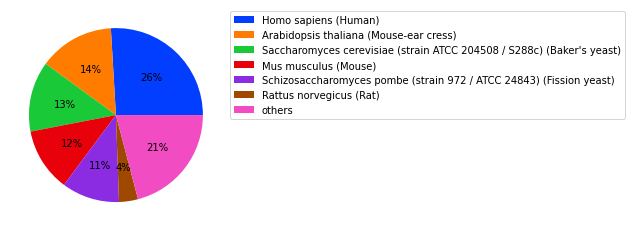

In [242]:
pie_chart(bench)

#### C. Kingdom level (training data and benchmark)

In [295]:
train

,UniProtKB accession,Taxa,Kingdom,Class,Cross-validation fold,Sequence (first 50 N-terminal residues),SP cleavage-site annotation
0,P61916,Homo sapiens (Human),Metazoa,SP,0,MRFLAATFLLLALSTAAQAEPVQFKDCGSVDGVIKEVNVSPCPTQP...,SSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNNN...
1,Q7M3V1,Chelonus sp. nr. curvimaculatus (Parasitic wasp),Metazoa,SP,0,MAGKEVIFIMALFIAVESSPIFSFDDLVCPSVTSLRVNVEKNECST...,SSSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNN...
2,Q08738,Bombyx mori (Silk moth),Metazoa,SP,0,MRVFLAICLSLTVALAAETGKYTPFQYNRVYSTVSPFVYKPGRYVA...,SSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
3,Q41350,Solanum lycopersicum (Tomato) (Lycopersicon es...,Plants,SP,0,MASSSAKILLPLSLLFTLLSLSQSTNPNFILTLVNNCPYTIWPAIQ...,SSSSSSSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNN...
4,Q86SE1,Androctonus amoreuxi (African fattail scorpion...,Metazoa,SP,0,MNYLVMISLALLLMIGVESVRDGYIVYPHNCVYHCIPSCDGLCKEN...,SSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNNN...
...,...,...,...,...,...,...,...
1718,P62597,Gallus gallus (Chicken),Metazoa,NO_SP,4,MPVQVLKIIKGKPETQLPSHLQREDLKHLQTGLDHTNKYFQGIVIL...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
1719,Q7K4M4,Drosophila melanogaster (Fruit fly),Metazoa,NO_SP,4,MSKFLDMLSGSQCVSLEKCGDVVVSTNDCMIALYCHFCRDLFTQLP...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
1720,Q14146,Homo sapiens (Human),Metazoa,NO_SP,4,MAAVYSGISLKLKSKTTSWEDKLKLAHFAWISHQCFLPNKEQVLLD...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
1721,B2RWS6,Mus musculus (Mouse),Metazoa,NO_SP,4,MAENVVEPGPPSAKRPKLSSPALSASASDGTDFGSLFDLEHDLPDE...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...


In [306]:
train['Kingdom'].unique()

array(['Metazoa', 'Plants', 'Fungi', 'Other'], dtype=object)

In [301]:
def pie_chart_kingdom(df):
  king = df['Kingdom']
  king_series = king.value_counts() #obtains the counts of each unique value
  king_series = king_series.sort_values(ascending=False) #alternative .nlargest(10)
  #king_series_top = king_series_sorted[0:6] #extracting top 6
  #king_series_rest = king_series_sorted[7:]
  #others_series = pd.Series({'others':king_series_rest.sum()}) #creating a series that containg the sum of the others
  #king_series_complete = pd.concat([king_series_top, others_series])
  print(king_series)
  labels = king_series.index.tolist() #labels
  count = king_series.values.tolist() #count for each label
  colors = sb.color_palette('bright')[:len(labels)]  #define color palette
  plt.pie(count, colors = colors, autopct='%.0f%%')
  plt.legend(labels, loc='upper left', bbox_to_anchor=(1,1)) #bbox controls the position of the legend
  plt.show()

Metazoa    956
Fungi      429
Plants     314
Other       24
Name: Kingdom, dtype: int64


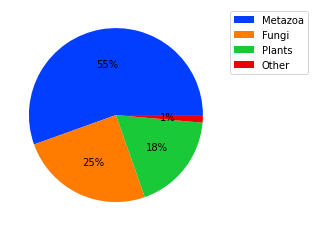

In [302]:
pie_chart_kingdom(train)

Metazoa    3707
Plants     1890
Fungi      1743
Other       116
Name: Kingdom, dtype: int64


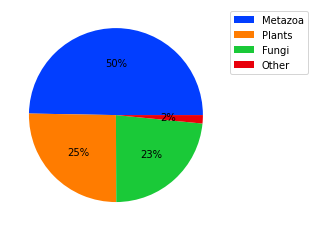

In [307]:
pie_chart_kingdom(bench)

### 5. Sequence logo of the SP cleavage sites

In [243]:
def cleavage_seq(data):
  sequence = [seq for seq in data['Sequence (first 50 N-terminal residues)']]
  sp = [seq for seq in data['SP cleavage-site annotation']]
  seq_list = []
  for i in range(len(sequence)):
    #cleav_seq = ''
    for j in range(len(sequence[i])):
      if sp[i][j] == "S":
        pass
      elif sp[i][j-1] == "S":
        cleav_seq = sequence[i][j-13:j+2]
    seq_list.append(cleav_seq)
  return seq_list

In [244]:
def write_sequences(seq_list, name):
  with open(name, 'w') as fh:
    for seq in seq_list:
      fh.write(seq+'\n')

In [245]:
train_seq_list = cleavage_seq(train_sp)

In [246]:
write_sequences(train_seq_list, 'train_sequences.txt')

In [247]:
bench_seq_list = cleavage_seq(bench_sp)

In [248]:
write_sequences(bench_seq_list, 'bench_sequences.txt')